### Capstone 3: Data Wrangling - Snowflake Cloud Datawarehouse vs. On-Prem MSSQL Comparison

#### Import Relevant Packages

In [1]:
import pandas as pd 
import sqlalchemy 
import matplotlib.pyplot as plt 
import pyodbc
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os 
import warnings


warnings.filterwarnings("ignore")

#### Connect to Local MSSQL Instance and Load SQL Query

In [2]:
# Define connection string
connection_string = 'mssql+pyodbc://REHAN-DESKTOP\SQLEXPRESS/AdventureWorks2022?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'


# Create SQLAlchemy Engine
engine = sqlalchemy.create_engine(connection_string)

# SQL query
query = """ SELECT
    SOH.SalesOrderID,
    SOH.OrderDate,
    P.ProductID,
    P.Name AS ProductName,
    SOD.OrderQty,
    SOD.UnitPrice,
    SOD.LineTotal
FROM
Sales.SalesOrderHeader AS SOH
JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID
JOIN Sales.Customer AS C ON SOH.CustomerID = C.CustomerID
JOIN Production.Product AS P ON SOD.ProductID = P.ProductID
ORDER BY SOH.OrderDate DESC """


#### Connect to Snowflake Cloud Instance

In [3]:
# Add Connection Parameters
snowflake_conn = snowflake.connector.connect(
    user='REHANK1990',
    password='Bismillah!1',
    account='sajugab-fma81222',
    warehouse='COMPUTE_WH',
    database='ADVENTUREWORKS2022',
    schema='ADVENTUREWORKS2022',
    role='ACCOUNTADMIN'
)

    
snowflake_query="""SELECT
    SOH.SalesOrderID,
    SOH.OrderDate,
    P.ProductID,
    P.Name AS ProductName,
    SOD.OrderQty,
    SOD.UnitPrice,
    SOD.LineTotal
FROM "Sales.SalesOrderHeader" AS SOH
JOIN "Sales.SalesOrderDetail" AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID
JOIN "Sales.Customer" AS C ON SOH.CustomerID = C.CustomerID
JOIN "Production.Product" AS P ON SOD.ProductID = P.ProductID
ORDER BY SOH.OrderDate DESC"""


#### Add Both Queries Into Dataframe

###### MSSQL Dataframe


In [4]:
# Execute query and read data into DataFrame (MSSQL)
sql_df = pd.read_sql(query, engine)

# Perform data analysis or manipulation
print(sql_df.head())  # Display first few rows of DataFrame

#capture df load time
sql_load_seconds = 7.8

   SalesOrderID  OrderDate  ProductID            ProductName  OrderQty  \
0         75084 2014-06-30        876    Hitch Rack - 4-Bike         1   
1         75085 2014-06-30        712           AWC Logo Cap         1   
2         75085 2014-06-30        877  Bike Wash - Dissolver         1   
3         75086 2014-06-30        877  Bike Wash - Dissolver         1   
4         75087 2014-06-30        707  Sport-100 Helmet, Red         1   

   UnitPrice  LineTotal  
0     120.00     120.00  
1       8.99       8.99  
2       7.95       7.95  
3       7.95       7.95  
4      34.99      34.99  


###### Snowflake Dataframe


In [5]:
# Create a DataFrame using fetched rows and column names
snowflake_df = pd.read_sql(snowflake_query, snowflake_conn)

# Close the cursor and connection when done
#cursor.close()
#snowflake_conn.close()

# Now you can work with the DataFrame
print(snowflake_df.head(10))  # Display the first few rows of the DataFrame

#Snowflake Load Time 
snowflake_load_seconds = 0.6

   SALESORDERID  ORDERDATE  PRODUCTID                      PRODUCTNAME  \
0         75119 2014-06-30        873              Patch Kit/8 Patches   
1         75123 2014-06-30        712                     AWC Logo Cap   
2         75123 2014-06-30        879           All-Purpose Bike Stand   
3         75123 2014-06-30        878            Fender Set - Mountain   
4         75122 2014-06-30        712                     AWC Logo Cap   
5         75122 2014-06-30        878            Fender Set - Mountain   
6         75121 2014-06-30        707            Sport-100 Helmet, Red   
7         75121 2014-06-30        930                 HL Mountain Tire   
8         75120 2014-06-30        712                     AWC Logo Cap   
9         75120 2014-06-30        884  Short-Sleeve Classic Jersey, XL   

   ORDERQTY  UNITPRICE  LINETOTAL  
0         1          2          2  
1         1          9          9  
2         1        159        159  
3         1         22         22  
4    

#### Set Column Names to Match

In [6]:
#set snowflake df columns to be the same as sql df
snowflake_df.columns = sql_df.columns 
print(sql_df.columns)

Index(['SalesOrderID', 'OrderDate', 'ProductID', 'ProductName', 'OrderQty',
       'UnitPrice', 'LineTotal'],
      dtype='object')


#### Check Data Types in Both Dataframes

In [7]:
#check datatypes for sql df
sql_df.dtypes

SalesOrderID             int64
OrderDate       datetime64[ns]
ProductID                int64
ProductName             object
OrderQty                 int64
UnitPrice              float64
LineTotal              float64
dtype: object

In [8]:
#check datatypes for snowflake df
snowflake_df.dtypes

SalesOrderID             int64
OrderDate       datetime64[ns]
ProductID                int64
ProductName             object
OrderQty                 int64
UnitPrice                int64
LineTotal                int64
dtype: object

In [9]:
#change snowflake dtypes to match sql_df
snowflake_df[['UnitPrice', 'LineTotal']] = snowflake_df[['UnitPrice', 'LineTotal']].astype('float64')

In [10]:
snowflake_df.dtypes

SalesOrderID             int64
OrderDate       datetime64[ns]
ProductID                int64
ProductName             object
OrderQty                 int64
UnitPrice              float64
LineTotal              float64
dtype: object

### EDA on Both Dataframes

###### Snowflake Dataframe


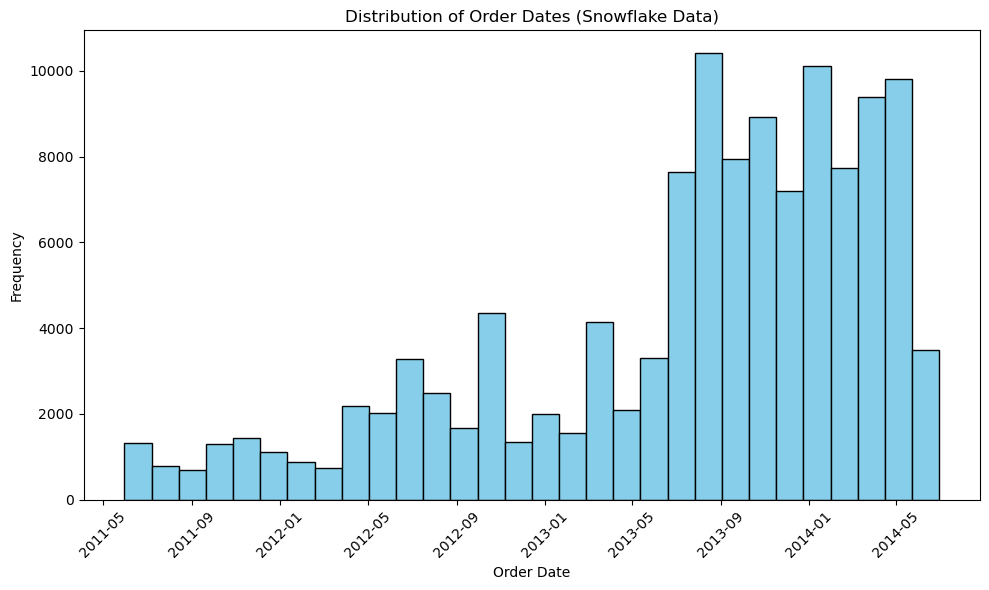

In [11]:
#check date ranges for dataframes Histogram 
plt.figure(figsize=(10, 6))
plt.hist(snowflake_df['OrderDate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Dates (Snowflake Data)')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

###### MSSQL Dataframe

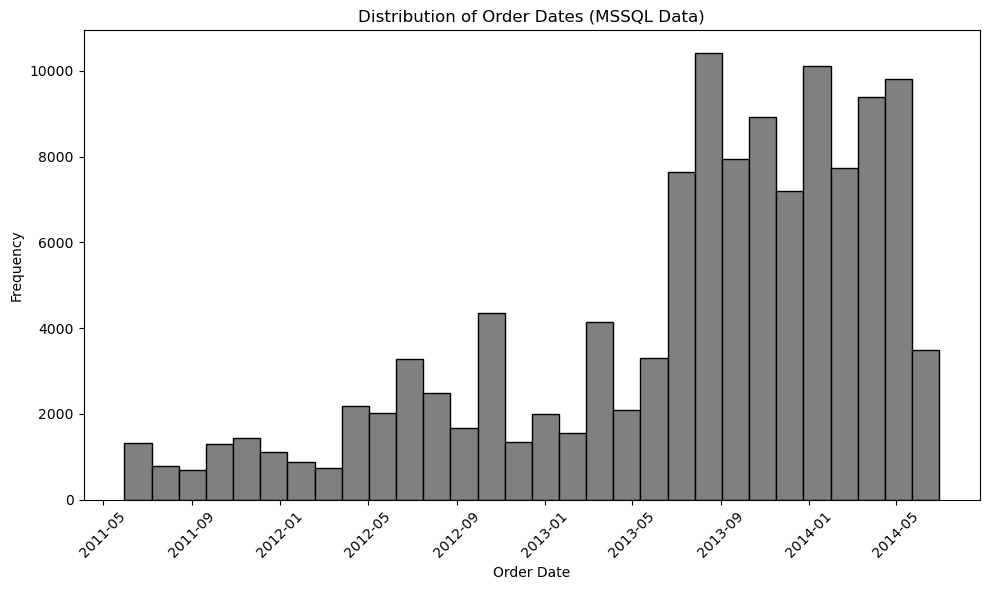

In [12]:
#check date ranges for dataframes Histogram MSSQL
plt.figure(figsize=(10, 6))
plt.hist(sql_df['OrderDate'], bins=30, color='grey', edgecolor='black')
plt.title('Distribution of Order Dates (MSSQL Data)')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### What was the Top 5 Most Ordered Product in this timeframe?

###### Snowflake Dataframe

In [13]:
snowflake_df.groupby(['ProductName'])['OrderQty'].sum().nlargest(5).to_frame()

,OrderQty
ProductName,
AWC Logo Cap,8311
Water Bottle - 30 oz.,6815
"Sport-100 Helmet, Blue",6743
"Long-Sleeve Logo Jersey, L",6592
"Sport-100 Helmet, Black",6532


###### MSSQL Dataframe

In [14]:
sql_df.groupby(['ProductName'])['OrderQty'].sum().nlargest(5).to_frame()

,OrderQty
ProductName,
AWC Logo Cap,8311
Water Bottle - 30 oz.,6815
"Sport-100 Helmet, Blue",6743
"Long-Sleeve Logo Jersey, L",6592
"Sport-100 Helmet, Black",6532


#### What was the most sold product each year?

###### Snowflake Dataframe

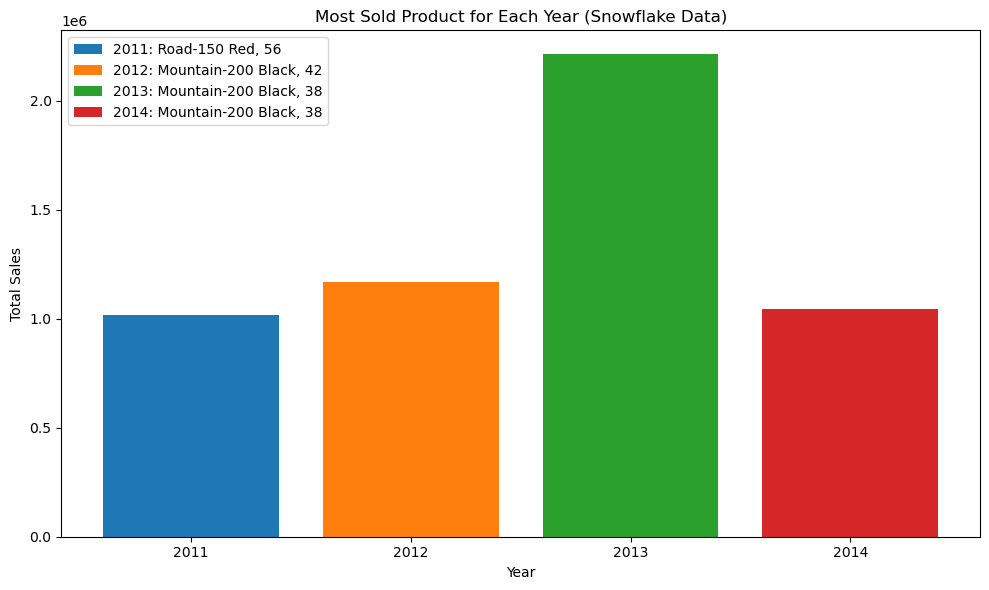

In [15]:
#create columns to add in year
snowflake_df['OrderYear'] = snowflake_df['OrderDate'].dt.year
sql_df['OrderYear'] = sql_df['OrderDate'].dt.year

grouped = snowflake_df.groupby(['OrderYear', 'ProductName'])['LineTotal'].sum().reset_index()

# Find the product with the maximum total sales for each year
max_sales = grouped.loc[grouped.groupby('OrderYear')['LineTotal'].idxmax()]

# Visualize the results
plt.figure(figsize=(10, 6))
for year, group in max_sales.groupby('OrderYear'):
    plt.bar(str(year), group['LineTotal'], label=f'{year}: {group["ProductName"].values[0]}')
plt.title('Most Sold Product for Each Year (Snowflake Data)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

###### MSSQL Dataframe

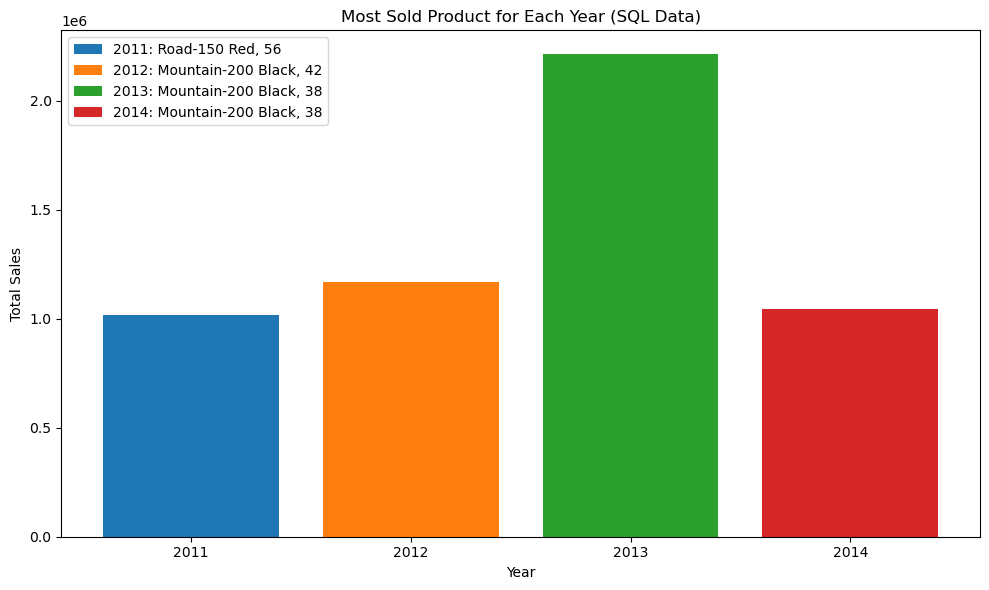

In [16]:
grouped = sql_df.groupby(['OrderYear', 'ProductName'])['LineTotal'].sum().reset_index()

# Find the product with the maximum total sales for each year
max_sales = grouped.loc[grouped.groupby('OrderYear')['LineTotal'].idxmax()]

# Visualize the results
plt.figure(figsize=(10, 6))
for year, group in max_sales.groupby('OrderYear'):
    plt.bar(str(year), group['LineTotal'], label=f'{year}: {group["ProductName"].values[0]}')
plt.title('Most Sold Product for Each Year (SQL Data)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Pre-processing and Modeling

###### Snowflake Dataframe

In [22]:
#Check to see NA columns prior to building model
if snowflake_df.isna().any().any():
    print("Snowflake DataFrame has NA values")
else:
    print("Snowflake DataFrame does not have NA values")

Snowflake DataFrame does not have NA values


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# Preprocessing

# Selecting relevant columns
selected_columns = ['SalesOrderID', 'OrderDate', 'ProductID', 'UnitPrice', 'LineTotal', 'OrderYear']
data = snowflake_df[selected_columns]

# Split data into features (X) and target variable (y)
X = data[['SalesOrderID', 'ProductID', 'UnitPrice', 'LineTotal', 'OrderYear']]
y = data['LineTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [27]:
# Model Creation
# Initialize and fit the Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest Mean Squared Error: 11.069648899604346


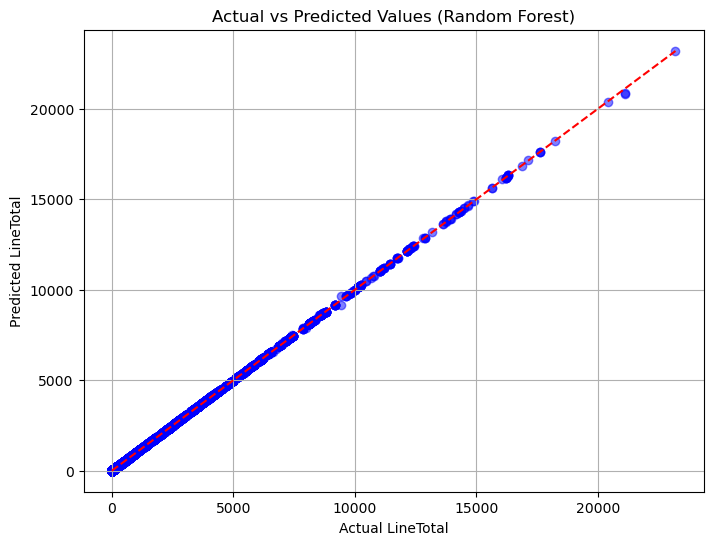

In [32]:
# Scatter plot showing actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual LineTotal')
plt.ylabel('Predicted LineTotal')
plt.grid(True)
plt.show()

Linear Regression

In [34]:
# Model Creation
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.1918924879563647e-24


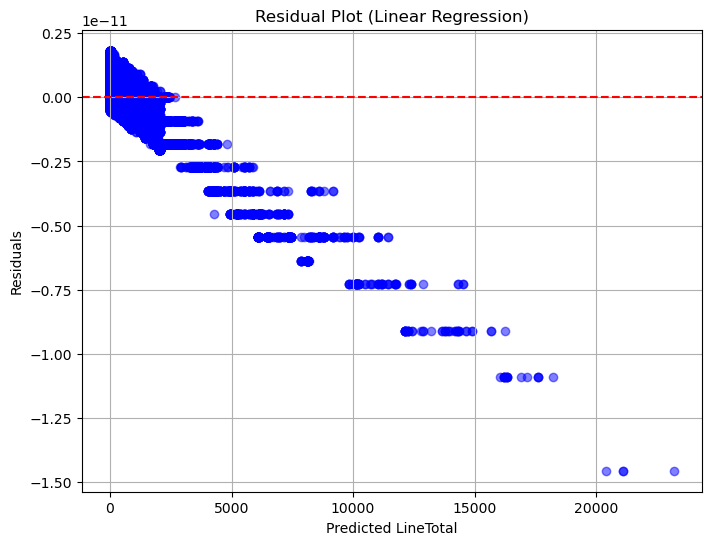

In [36]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted LineTotal')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

###### MSSQL Dataframe

In [45]:
#Check to see NA columns prior to building model
if sql_df.isna().any().any():
    print("SQL DataFrame has NA values")
else:
    print("SQL DataFrame does not have NA values")

SQL DataFrame does not have NA values


In [46]:
# Preprocessing
# Selecting relevant columns
selected_columns2 = ['SalesOrderID', 'OrderDate', 'ProductID', 'UnitPrice', 'LineTotal', 'OrderYear']
data2 = sql_df[selected_columns2]

# Split data into features (X) and target variable (y)
X2 = data2[['SalesOrderID', 'ProductID', 'UnitPrice', 'LineTotal', 'OrderYear']]
y2 = data2['LineTotal']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

Random Forest

In [47]:
# Model Creation
# Initialize and fit the Random Forest regressor model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# Make predictions on the testing set
y_pred_rf2 = rf_model2.predict(X_test2)

# Evaluate the Random Forest model
mse_rf2 = mean_squared_error(y_test2, y_pred_rf2)
print("Random Forest Mean Squared Error:", mse_rf2)

Random Forest Mean Squared Error: 19.641633735726653


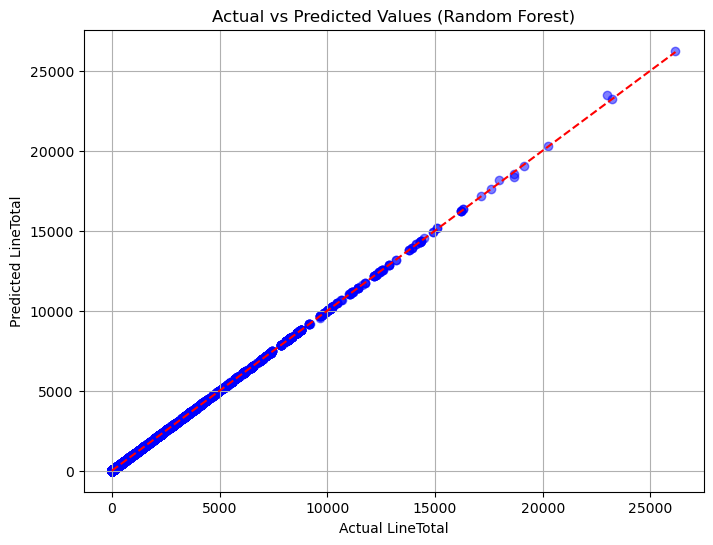

In [48]:
# Scatter plot showing actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred_rf2, color='blue', alpha=0.5)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual LineTotal')
plt.ylabel('Predicted LineTotal')
plt.grid(True)
plt.show()

Linear Regression

In [49]:
# Model Creation
# Initialize and fit the linear regression model
model3 = LinearRegression()
model3.fit(X_train2, y_train2)

# Make predictions on the testing set
y_pred3 = model3.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred3)
print("Mean Squared Error:", mse2)

Mean Squared Error: 9.36553683857179e-24


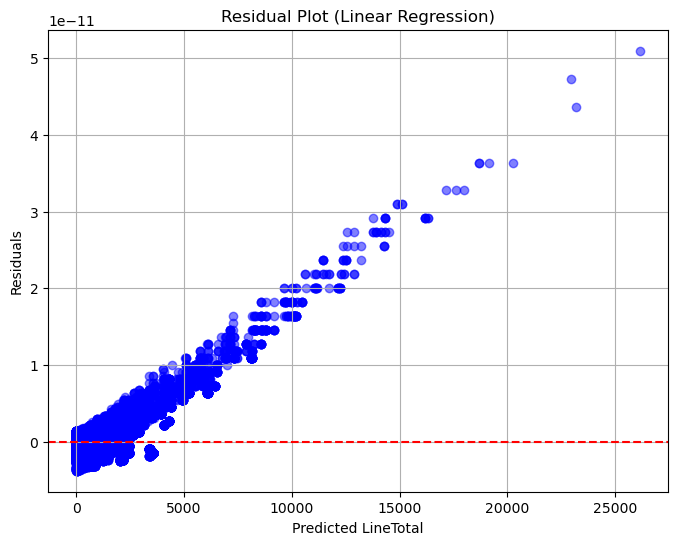

In [50]:
# Calculate residuals
residuals2 = y_test2 - y_pred3

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred3, residuals2, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted LineTotal')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#### Comparison Conclusion

In [56]:
# Create DataFrame to compare Snowflake and SQL Server
comparison_df = pd.DataFrame({
    'Aspect': ['Scalability', 'Cost', 'Maintenance', 'Performance', 'Security', 'Time to Load Dataframe (Speed)', 'Connection to Python'],
    'Snowflake': ['Highly scalable, elastic, pay-as-you-go model', 'Pay for what you use, may be more cost-effective for small to medium-sized workloads', 'Managed service, minimal maintenance required', 'Optimized for cloud, may have faster performance for certain workloads', 'Built-in security features, granular access controls', '0.6 Seconds', 'Built-In Snowflake Connector (very easy)'],
    'SQL_Server_On_Premises': ['Requires hardware procurement and setup, limited scalability', 'Upfront hardware and software costs, may be expensive for large workloads', 'Requires in-house expertise for maintenance, updates, and backups', 'Depends on hardware configuration, may be slower for large workloads', 'Requires additional security measures, regular updates', '16.8 Seconds', 'Build Custom Connection through SQL Alchemy (easy)']
})

# Set display option to show full text
pd.set_option('display.max_colwidth', None)

# Display the comparison DataFrame
comparison_df

,Aspect,Snowflake,SQL_Server_On_Premises
0,Scalability,"Highly scalable, elastic, pay-as-you-go model","Requires hardware procurement and setup, limited scalability"
1,Cost,"Pay for what you use, may be more cost-effective for small to medium-sized workloads","Upfront hardware and software costs, may be expensive for large workloads"
2,Maintenance,"Managed service, minimal maintenance required","Requires in-house expertise for maintenance, updates, and backups"
3,Performance,"Optimized for cloud, may have faster performance for certain workloads","Depends on hardware configuration, may be slower for large workloads"
4,Security,"Built-in security features, granular access controls","Requires additional security measures, regular updates"
5,Time to Load Dataframe (Speed),0.6 Seconds,16.8 Seconds
6,Connection to Python,Built-In Snowflake Connector (very easy),Build Custom Connection through SQL Alchemy (easy)


In [57]:
print("Based on cost, speed, security and long-term costs Snowflake is the better option of the two")

Based on cost, speed, security and long-term costs Snowflake is the better option of the two
